# investpy - a Python package for financial historical data extraction from Investing

__por Álvaro Bartolomé del Canto @ alvarob96 en GitHub__

---
## Introducción

El paquete de Python [investpy](https://github.com/alvarob96/investpy) ha sido creado por [Álvaro Bartolomé del Canto](https://www.linkedin.com/in/alvarob96/), el cual es la plataforma de extracción de datos principal de su Trabajo de Fin de Grado (TFG) titulado "**Machine Learning for Stock Investment Recommendations**" el cual se basa en el uso de técnicas de Inteligencia Artificial para la predicción del comportamiento futuro de las distintas acciones de las empresas que forman el mercado contínuo español, de modo que combinando el Machine Learning con las técnicas de análisis técnico propias del campo de la inversión, se propone una plataforma que identificará señales de compra/venta a partir del análisis y predicción de una serie temporal de valores **OHLC** (_Open High Low Close_).

Por tanto, a lo largo de este informe se describirá el uso principal que se le ha dado a **investpy** para el TCUE titulado "**Sistema de Recomendación de Inversión en base a Predicciones de Mercado y Análisis de Opinión de Twitter**", cuya plataforma principal de extracción de datos será **investpy**.

**investpy** recupera la información de [Investing.com](https://es.investing.com) y la formatea para poder ser usada por Python, en este caso en particular la información requerida en el proyecto es la que corresponde a las acciones (*equities*) del mercado continuo español.

---
## Uso

In [1]:
import investpy

In [2]:
(investpy.__author__, investpy.__version__)

('Alvaro Bartolome <alvarob96@usal.es>', '0.8.8')

Inicialmente, se puede recuperar el ``pandas.DataFrame`` que contiene la información sobre las acciones de las empresas indexadas en **investpy**, a partir de la cual se puede realizar el estudio. Esta función es útil de cara a realizar un estudio completo del mercado, o bien, de cara a nuevos usuarios que desconozcan las empresas que forman del mercado continuo español de forma que este listado les de una idea de qué empresas son; junto con información adicional y/o de uso interno por **investpy**.

In [3]:
equities = investpy.get_equities()

In [4]:
equities

,full_name,id,isin,name,tag
0,Actividades de Construcción y Servicios S.A.,442,ES0167050915,ACS,acs-cons-y-serv
1,Abengoa S.A.,443,ES0105200416,Abengoa,abengoa
2,Atresmedia Corp. de Medios de Com. S.A.,444,ES0109427734,Atresmedia,atresmedia
3,Acerinox S.A.,445,ES0132105018,Acerinox,acerinox
4,Banco Bilbao Vizcaya Argentaria S.A.,446,ES0113211835,BBVA,bbva
5,Bankinter S.A.,447,ES0113679I37,Bankinter,bankinter
6,Bolsas y Mercados Españoles,448,ES0115056139,BME,bolsas-y-mer-esp
7,Acciona S.A.,449,ES0125220311,Acciona,acciona-sa
8,CaixaBank S.A.,452,ES0140609019,CaixaBank,caixabank-sa
9,Enagás S.A.,453,ES0130960018,Enagás,enagas


Ahora a modo de ejemplo, se seleccionará una acción aleatoria de las previamente listadas a partir de su nombre, que es la entrada requerida por las funciones de extracción de datos de los valores de mercado de dicha acción tanto recientes como históricos.

In [5]:
from random import choice

In [12]:
choice(equities['name'].tolist())

'Mapfre'

De este modo, haremos uso de la siguiente función para recuperar la información reciente de los valores **OHLC**, junto con el **Volumen**, en forma de ``pandas.DataFrame`` de la acción previamente seleccionada de forma aleatoria.

In [14]:
params = {
    'equity': 'Mapfre',
    'as_json': False,
    'order': 'ascending',
    'debug': True
}

**Referencia: https://investpy.readthedocs.io/main_api.html#investpy.get_recent_data**

In [17]:
df = investpy.get_recent_data(equity=params['equity'],
                              as_json=params['as_json'],
                              order=params['order'],
                              debug=params['debug'])

INFO:investpy:Searching introduced equity on Investing.com
INFO:investpy:Mapfre found on Investing.com
INFO:investpy:Request sent to Investing.com!
INFO:investpy:Request to Investing.com data succeeded with code 200!
INFO:investpy:Data parsing process starting...
INFO:investpy:Data parsing process finished...


In [22]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,2.708,2.713,2.665,2.688,4240000
2018-01-03,2.702,2.722,2.680,2.718,4139999
2018-01-04,2.751,2.768,2.710,2.710,4960000
2018-01-05,2.810,2.819,2.767,2.767,7660000
2018-01-08,2.793,2.829,2.787,2.824,4670000


Del mismo modo, **investpy** permite recuperar información histórica de una acción de un marco temporal a determinar por el usuario, entre el cual se recuperará la información de **Investing**. Tal y como se ha explicado previamente, la información resultante en este caso será en forma de ``pandas.DataFrame``.

In [19]:
params = {
    'equity': 'Mapfre',
    'from_date': '01/01/2018',
    'to_date': '01/01/2019',
    'as_json': False,
    'order': 'ascending',
    'debug': True
}

**Referencia: https://investpy.readthedocs.io/main_api.html#investpy.get_historical_data**

In [20]:
df = investpy.get_historical_data(equity=params['equity'],
                                  from_date=params['from_date'],
                                  to_date=params['to_date'],
                                  as_json=params['as_json'],
                                  order=params['order'],
                                  debug=params['debug'])

INFO:investpy:Searching introduced equity on Investing.com
INFO:investpy:Mapfre found on Investing.com
INFO:investpy:Request sent to Investing.com!
INFO:investpy:Request to Investing.com data succeeded with code 200!
INFO:investpy:Data parsing process finished...


In [21]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,2.708,2.713,2.665,2.688,4240000
2018-01-03,2.702,2.722,2.680,2.718,4139999
2018-01-04,2.751,2.768,2.710,2.710,4960000
2018-01-05,2.810,2.819,2.767,2.767,7660000
2018-01-08,2.793,2.829,2.787,2.824,4670000


A través de **investpy** también será posible recuperar información adicional de cada una de las acciones de las empresas que forman el mercado continuo español, como lo es el perfil de empresa, que contiene una descripción detallada creada por la propia empresa sobre la acción de la misma y el ámbito al que se dedica.

Esto aporta un punto de vista sobre la empresa importante, sobretodo de cara a gente que no la conozca, ya que es la propia empresa la que escribe la información del perfil de empresa.

**Referencia: https://investpy.readthedocs.io/main_api.html#investpy.get_equity_company_profile**

In [23]:
profile = investpy.get_equity_company_profile(equity='Mapfre',
                                              language='spanish')

In [25]:
from pprint import pprint

In [26]:
pprint(profile)

{'desc': 'MAPFRE es una aseguradora global con presencia en los cinco '
         'continentes. Compañía de referencia en el mercado asegurador '
         'español, es el primer grupo asegurador multinacional en América '
         'Latina y uno de los 10 mayores grupos europeos por volumen de '
         'primas.\n'
         'Además, se sitúa entre las 20 primeras compañías de seguros de '
         'automóviles en Estados Unidos. En la actividad de Asistencia, es la '
         'tercera aseguradora mundial.\xa0\xa0\n'
         'MAPFRE cuenta con más de 38.000 empleados y con aproximadamente 34 '
         'millones de clientes en todo el mundo.\n'
         'En 2015, sus ingresos superaron los 26.700 millones de euros y el '
         'beneficio neto se situó en 709 millones.\n'
         '\xa0\n'
         '\xa0',
 'url': 'http://www.bolsamadrid.es/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0124244E34'}


---
## Visualización

Por último, en cuanto a la visualización de los datos, de forma complementaria se hará uso de las bibliotecas de Python [matplotlib](https://matplotlib.org) y [seaborn](https://seaborn.pydata.org/). Por tanto, se presenta la representación de las series temporales previamente extraidas de Investing a través de **investpy** de la forma:

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
%matplotlib inline
sns.set(style='whitegrid')

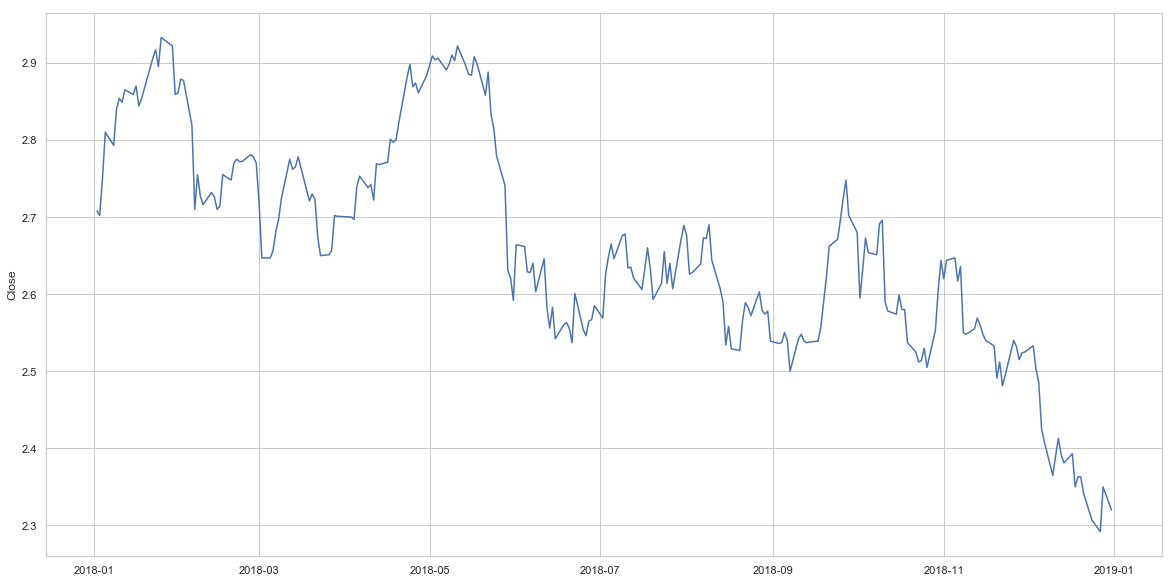

In [48]:
plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=df.index.values, y='Close', data=df)

También se presentará la matriz de correlación entre las distintas variables del conjunto de datos, es decir, entre las columnas del `pandas.DataFrame` que son: _\['Open', 'High', 'Low', 'Close', 'Volume'\]_

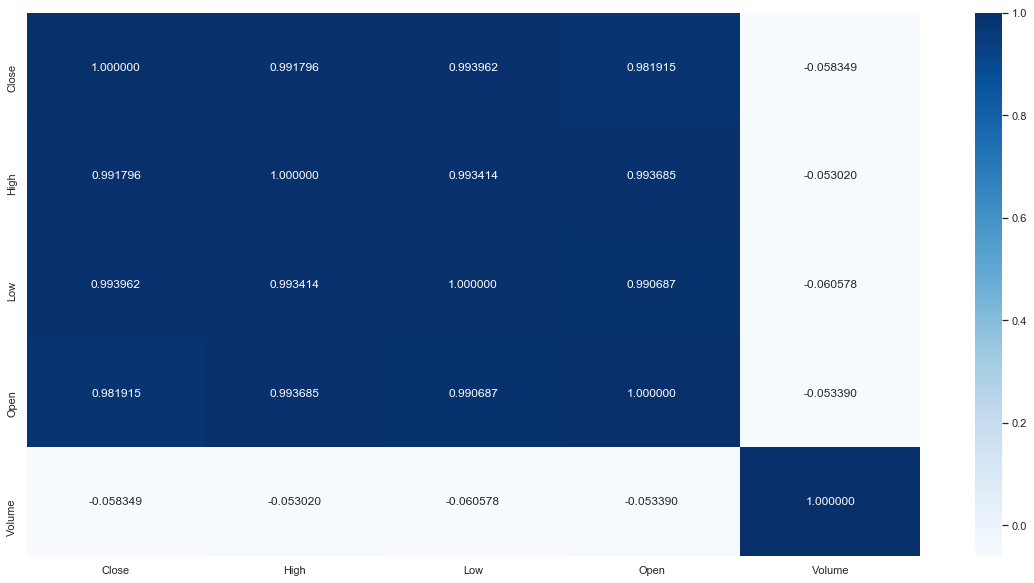

In [47]:
plt.figure(figsize=(20, 10))

corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues', annot=True, fmt='f')

---
## Información Adicional

Además, en [Kaggle](https://www.kaggle.com/) se ha subido un dataset que contiene los valores históricos de las principales acciones del mercado continuo español, a partir del cual varios usuarios han creado sus propios **Kernels** sobre el manejo y/o uso de dicha información para distintos propósitos/objetivos.

En base a dicho [dataset](https://www.kaggle.com/alvarob96/spanish-stocks-historical-data) subido a **Kaggle**, destacar que durante los meses de Mayo/Junio de 2019 se posicionó en el **Top 10 Hottests Datasets**, alcanzando la posición 6 del mundo en dicho ranking.

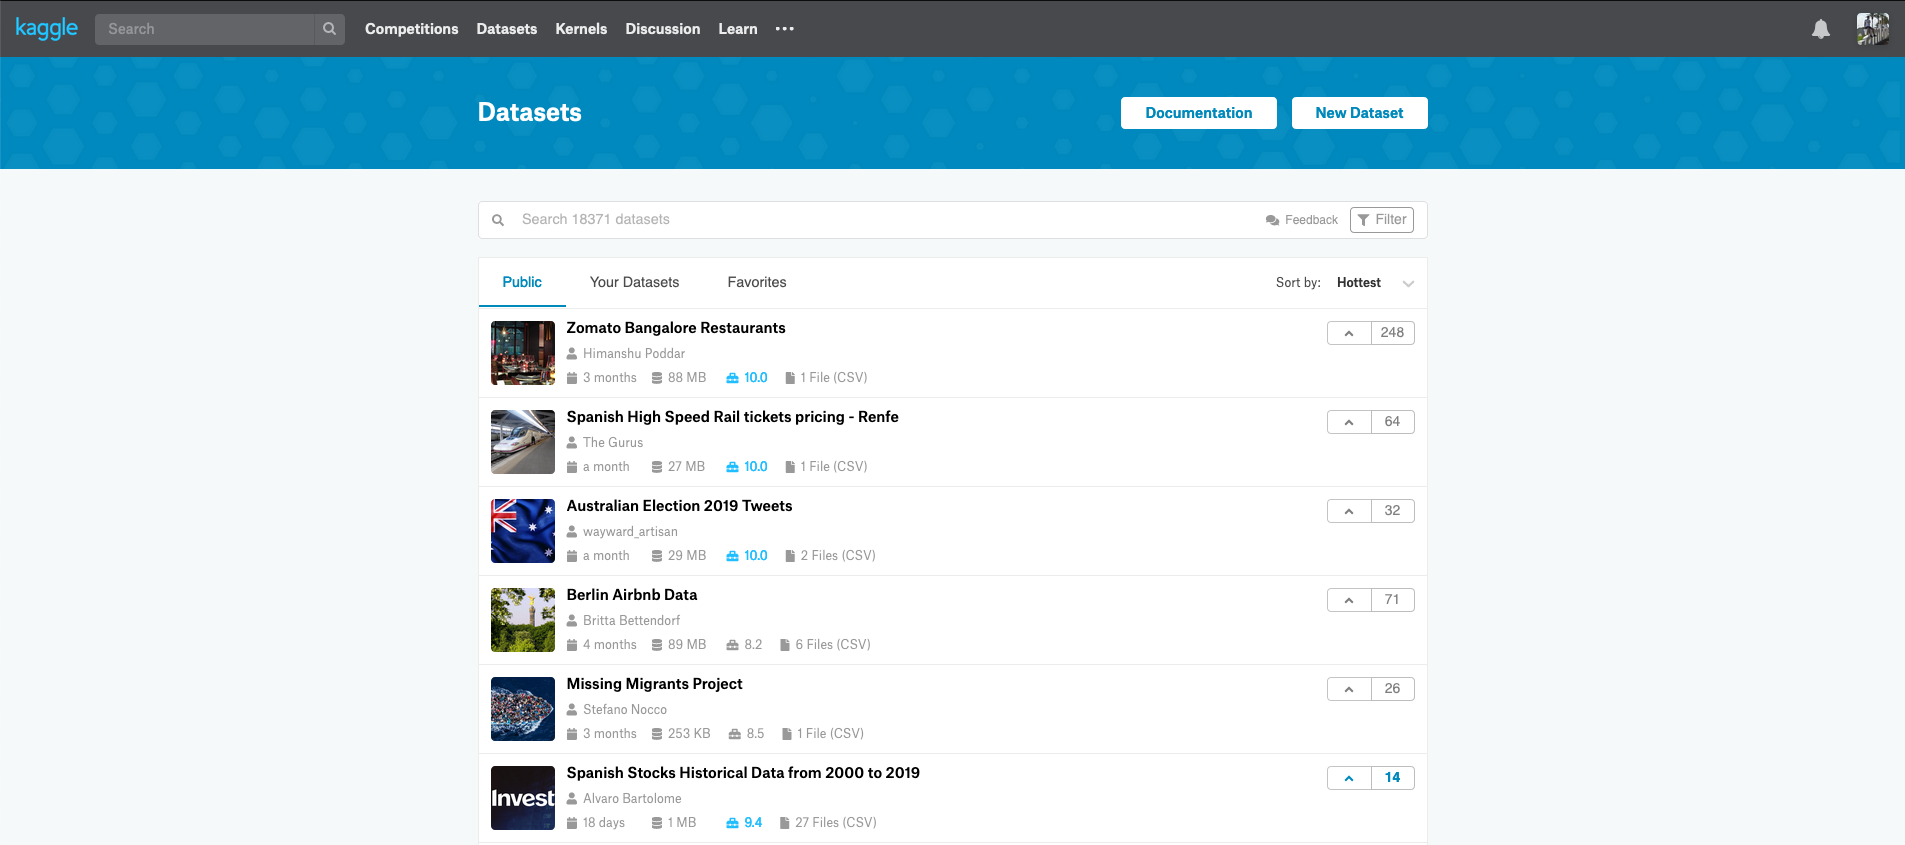

In [50]:
from IPython.display import Image
Image(filename='resources/top6-dataset.png')

Finalmente, el dataset alcanzó 42 votos.

---
## Referencias

Las referencias utilizadas a lo largo de este informe se pueden encontrar en la documentaión creada y generada utilizando [sphinx](http://www.sphinx-doc.org/en/master/), la cual está alojada en [Readthedocs](https://investpy.readthedocs.io/).

---
## Licencia

[MIT License](https://github.com/alvarob96/investpy/blob/master/LICENSE)

---
## Autor

**Álvaro Bartolomé del Canto, 2018-2019**